In [48]:
import tensorflow as tf 
from tensorflow import keras 
from keras import layers,models
import matplotlib.pyplot as plt 
import cv2 
import numpy as np

In [49]:
dataset = keras.preprocessing.image_dataset_from_directory(
    '/Users/eiphyusinn/Desktop/DeepLearningWithTF 2/Potato_disease_classification/PlantVillage',
    batch_size = 8,
    image_size = (256,256),
    shuffle = True,
)

Found 2152 files belonging to 4 classes.


In [50]:
IMG_SIZE = 256

In [51]:
dataset.class_names

['Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'trained_model']

In [52]:
class_names = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [53]:
len(dataset)

269

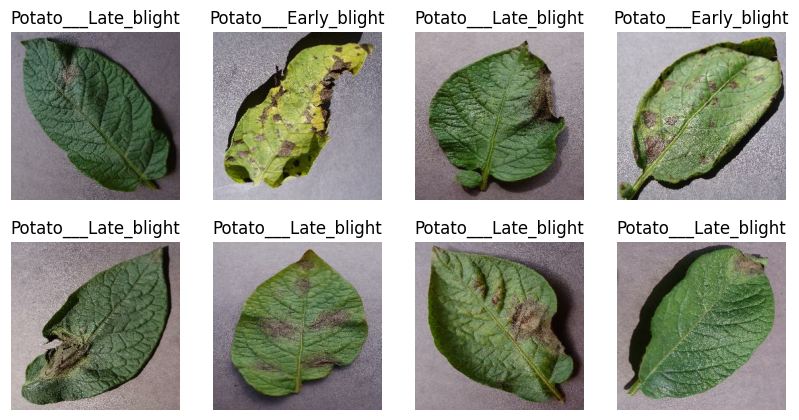

2025-03-09 20:41:27.913300: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [54]:
import matplotlib.pyplot as plt

for images, labels in dataset.take(1): 
    plt.figure(figsize=(10, 5))
    for i in range(8):  
        plt.subplot(2, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i].numpy()])
        plt.axis("off")
    plt.show()


In [55]:
68*32

2176

In [56]:
def train_test_split(ds, train_size=0.8, test_size=0.1, val_size=0.1, shuffle=True, shuffle_size=1000):
    if shuffle: 
        ds = ds.shuffle(shuffle_size, seed = 19)
    train_ds = ds.take(int(train_size*len(ds)))
    test_ds  = ds.skip(int(train_size*len(ds)))
    val_ds   = test_ds.take(int(test_size*len(ds)))
    test_ds   = test_ds.skip(int(test_size*len(ds)))
    return train_ds, test_ds, val_ds

In [57]:
train_ds, test_ds, val_ds = train_test_split(dataset)

In [58]:
train_ds = train_ds.cache().shuffle(2000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds  = test_ds.cache().shuffle(2000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds   = val_ds.cache().shuffle(2000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [59]:
data_augmentation = keras.Sequential([
                     keras.layers.RandomFlip("horizontal_and_vertical"),
                     keras.layers.RandomCrop(200,200),
                     keras.layers.RandomRotation(0.2)
])

resize_and_rescale = keras.Sequential([
                     keras.layers.Rescaling(0.1/255),
                     keras.layers.Resizing(IMG_SIZE,IMG_SIZE)
])

In [60]:
input_shape = (8, IMG_SIZE, IMG_SIZE, 3)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [61]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)       │ (8, 256, 256, 3)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (8, 254, 254, 32)      │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (8, 127, 127, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (8, 125, 125, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (8, 62, 62, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (8, 60, 60, 64)        │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (8, 30, 30, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (8, 28, 28, 64)        │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (8, 14, 14, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (8, 12, 12, 64)        │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (8, 6, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (8, 4, 4, 64)          │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (8, 2, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (8, 256)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (8, 64)                │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (8, 3)                 │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
model.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [64]:
history = model.fit(
            train_ds,
            epochs=10,
            batch_size=8,
            verbose=1,
            validation_data=val_ds
)

Epoch 1/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 36s 169ms/step - accuracy: 0.6495 - loss: 0.8036 - val_accuracy: 0.8365 - val_loss: 0.4848
Epoch 2/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 36s 167ms/step - accuracy: 0.8168 - loss: 0.4806 - val_accuracy: 0.6971 - val_loss: 0.6496
Epoch 3/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 37s 171ms/step - accuracy: 0.8099 - loss: 0.4909 - val_accuracy: 0.7837 - val_loss: 0.5502
Epoch 4/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 44s 203ms/step - accuracy: 0.8536 - loss: 0.3561 - val_accuracy: 0.8894 - val_loss: 0.3042
Epoch 5/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 56s 262ms/step - accuracy: 0.8780 - loss: 0.3309 - val_accuracy: 0.8510 - val_loss: 0.3538
Epoch 6/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 62s 290ms/step - accuracy: 0.8743 - loss: 0.2898 - val_accuracy: 0.7740 - val_loss: 0.5301
Epoch 7/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 55s 257ms/step - accuracy: 0.8742 - loss: 0.2941 - val_accuracy: 0.9327 - val_loss: 0.1674
Epoch 8/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 55s 256ms/step - accuracy: 0.9149 - loss: 0

In [65]:
scores = model.evaluate(test_ds)

28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9548 - loss: 0.1379


In [66]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [67]:
import os
save_dir = 'trained_model'
os.makedirs(save_dir,exist_ok=True)
model.save(f'{save_dir}/epoch_50.keras')

In [68]:
# model_path = '/Users/eiphyusinn/Desktop/DeepLearningWithTF 2/Potato_disease_classification/PlantVillage/trained_model/1/epoch_50.keras'
# model = keras.models.load_model(model_path)

In [69]:
loss,accuracy = model.evaluate(test_ds)
print(f'Loss : {loss}')
print(f'Accuray : {accuracy}')

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9421 - loss: 0.1348
Loss : 0.14769895374774933
Accuray : 0.9464285969734192


first image to predict
actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
predicted label: Potato___Late_blight  conf: 0.8744099


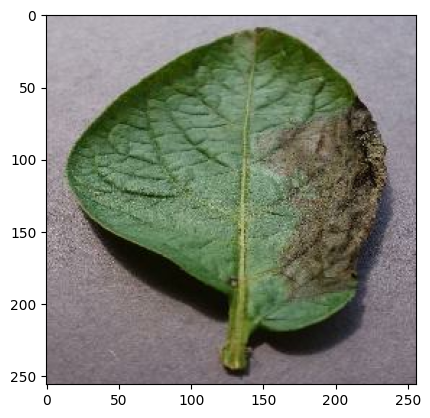

In [75]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])]," conf:",np.max(batch_prediction[0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


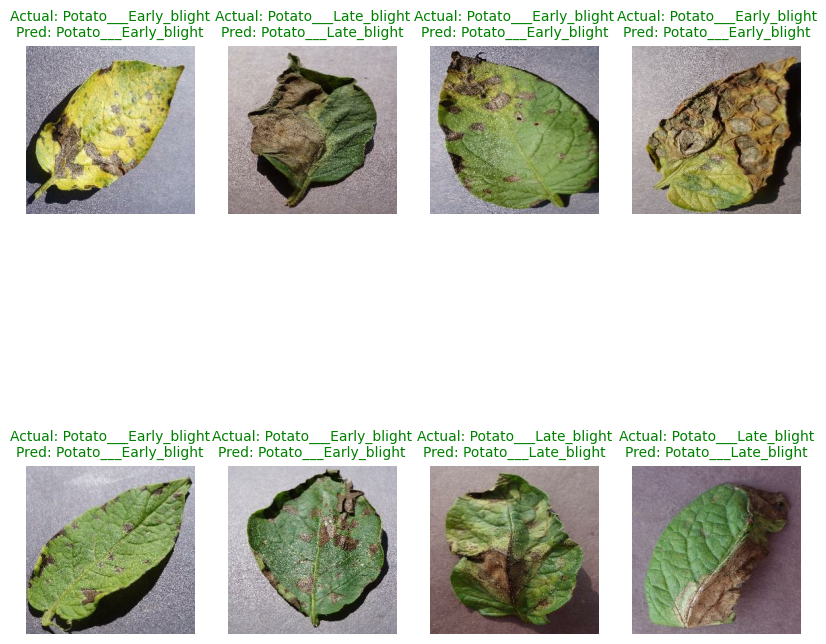

In [72]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))

for i, (img, label) in enumerate(train_ds.take(8)):
    first_img = img[0].numpy().astype('uint8')
    first_label = label[0].numpy()
    
    pred = model.predict(np.expand_dims(img[0], axis=0))
    predicted_label = np.argmax(pred)
    
    plt.subplot(2, 4, i + 1)
    plt.imshow(first_img)
    plt.axis("off")

    actual_class = class_names[first_label]
    predicted_class = class_names[predicted_label]
    title_color = "green" if first_label == predicted_label else "red"
    plt.title(f"Actual: {actual_class}\nPred: {predicted_class}", fontsize=10, color=title_color)

plt.show()

In [73]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


2025-03-09 20:50:50.378057: W tensorflow/core/framework/op_kernel.cc:1841] OP_REQUIRES failed at strided_slice_op.cc:117 : INVALID_ARGUMENT: slice index 8 of dimension 0 out of bounds.


InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:CPU:0}} slice index 8 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

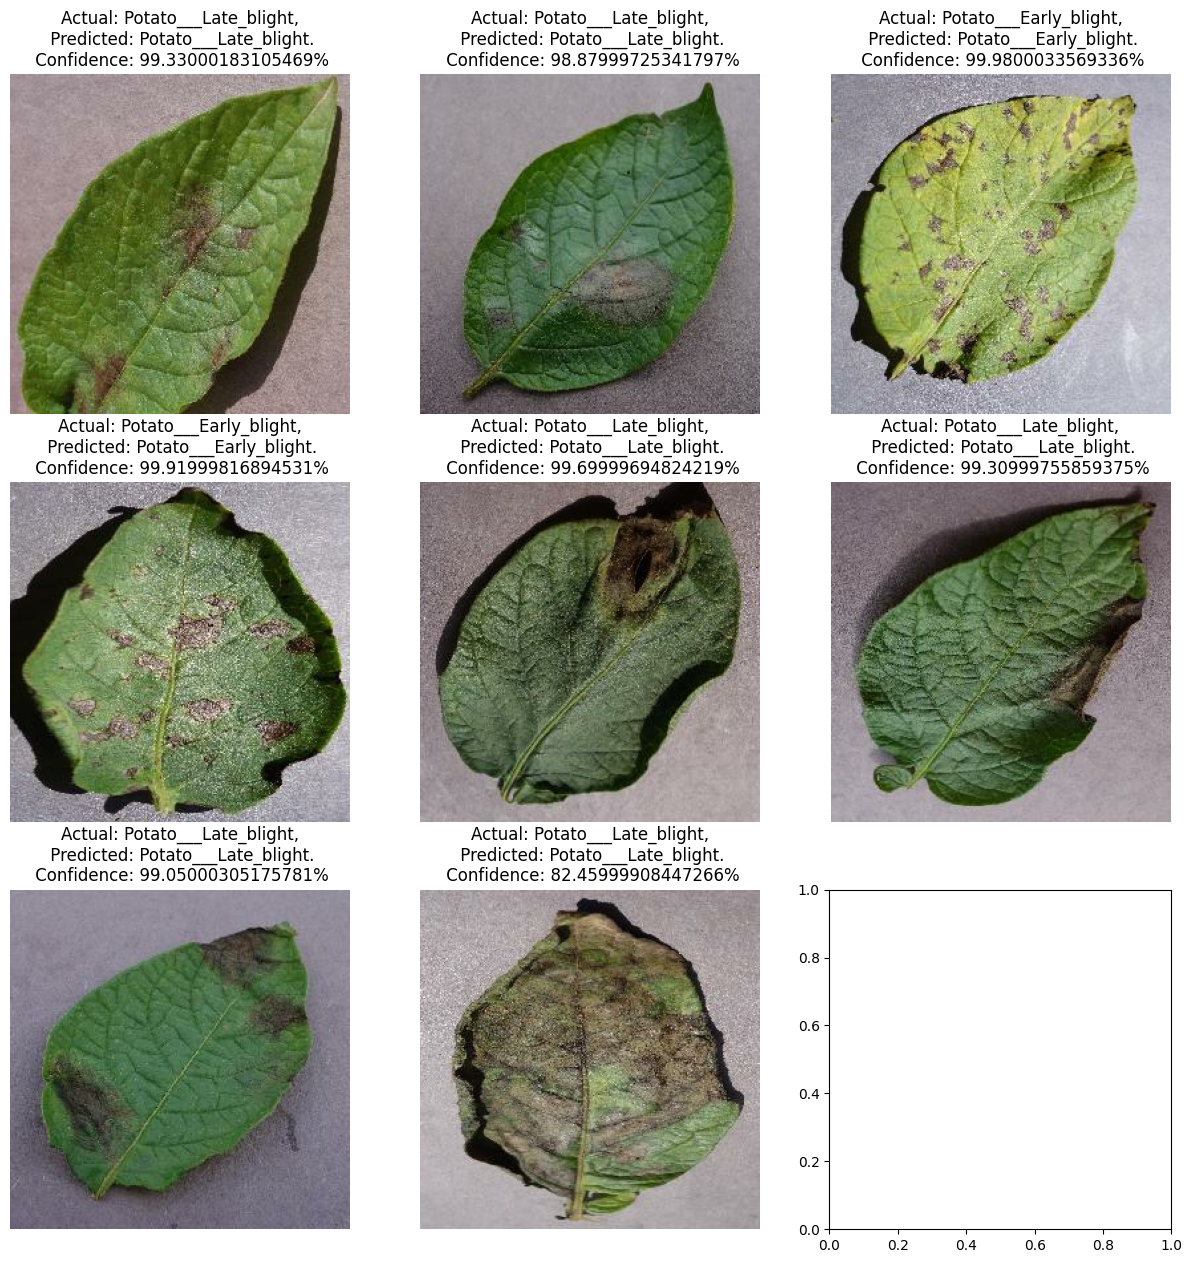

In [74]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")